In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
print(data_train.shape)
print(data_test.shape)

(891, 12)
(418, 11)


In [4]:
data_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Títulos de columnas a minúsculas

In [7]:
data_test.columns = data_test.columns.str.lower()
data_train.columns = data_train.columns.str.lower()

## Analizo nulos

In [8]:
cat_cols= data_train.select_dtypes(include=['object','category']).columns
num_cols = data_train.select_dtypes(exclude=['object','category']).columns

In [9]:
cat_cols_test = data_test.select_dtypes(include=['object','category']).columns
num_cols_test = data_test.select_dtypes(exclude=['object','category']).columns

In [10]:
# Analizo cuales columnas categóricas tienen valores nulos.

def contar_nulos(dataset, num_cols, cat_cols):

    # Calcular la cantidad de valores nulos en columnas numéricas
    num_nulos = dataset[num_cols].isnull().sum()
    num_nulos = num_nulos[num_nulos > 0]  # Filtrar para mostrar solo los valores mayores que 0

    # Calcular la cantidad de valores nulos en columnas categóricas
    cat_nulos = dataset[cat_cols].isnull().sum()
    cat_nulos = cat_nulos[cat_nulos > 0]  # Filtrar para mostrar solo los valores mayores que 0

    # Verificar si no hay valores nulos y devolver un mensaje apropiado
    if num_nulos.empty:
        print("No hay valores nulos en las variables numéricas.")
    else:
        print('Hay valores nulos en las variables numéricas.')

    if cat_nulos.empty:
        print("No hay valores nulos en las variables categóricas.")
    else:
        print('Hay valores nulos en las variables categóricas.')

    return num_nulos, cat_nulos

In [11]:
contar_nulos(data_train, num_cols, cat_cols)

Hay valores nulos en las variables numéricas.
Hay valores nulos en las variables categóricas.


(age    177
 dtype: int64,
 cabin       687
 embarked      2
 dtype: int64)

In [12]:
contar_nulos(data_test, num_cols_test, cat_cols_test)

Hay valores nulos en las variables numéricas.
Hay valores nulos en las variables categóricas.


(age     86
 fare     1
 dtype: int64,
 cabin    327
 dtype: int64)

#### Voy a tener que trabajar los valores nulos en 4 variables. Para el data_train age, cabin y embarked y para el data_test age, fare y cabin.

In [13]:
def contar_nulos_pct(dataset, num_cols, cat_cols):
    
    # Calcular la cantidad de valores nulos en columnas numéricas
    num_nulos = dataset[num_cols].isnull().sum()
    num_nulos = num_nulos[num_nulos > 0]/len(dataset)*100  # Filtrar para mostrar solo los valores mayores que 0

    # Calcular la cantidad de valores nulos en columnas categóricas
    cat_nulos = dataset[cat_cols].isnull().sum()
    cat_nulos = cat_nulos[cat_nulos > 0]/len(dataset)*100   # Filtrar para mostrar solo los valores mayores que 0

    # Verificar si no hay valores nulos y devolver un mensaje apropiado
    if num_nulos.empty:
        print("No hay valores nulos en las variables numéricas.")
    else:
        print('Si hay valores nulos en las variables numéricas.')

    if cat_nulos.empty:
        print("No hay valores nulos en las variables categóricas.")
    else:
        print('Si hay valores nulos en las variables categóricas.')

    return num_nulos, cat_nulos

In [14]:
contar_nulos_pct(data_train, num_cols, cat_cols)

Si hay valores nulos en las variables numéricas.
Si hay valores nulos en las variables categóricas.


(age    19.86532
 dtype: float64,
 cabin       77.104377
 embarked     0.224467
 dtype: float64)

In [15]:
contar_nulos_pct(data_test, num_cols_test, cat_cols_test)

Si hay valores nulos en las variables numéricas.
Si hay valores nulos en las variables categóricas.


(age     20.574163
 fare     0.239234
 dtype: float64,
 cabin    78.229665
 dtype: float64)

#### Para tener una mejor visión, lo analizo con porcentajes. La variable 'cabin', probablemente sea descartada ya que cuenta con 77-78% de nulos.

## Variable 'PassengerId'

In [16]:
data_train = data_train.set_index('passengerid')
data_test = data_test.set_index('passengerid')

#### Considero que hay dos opciones para trabajar el id del dataset, eliminarlo o utilziarlo como índice. En este caso lo dejare como índice.

## Primer Heatmap de Correlación

<Axes: >

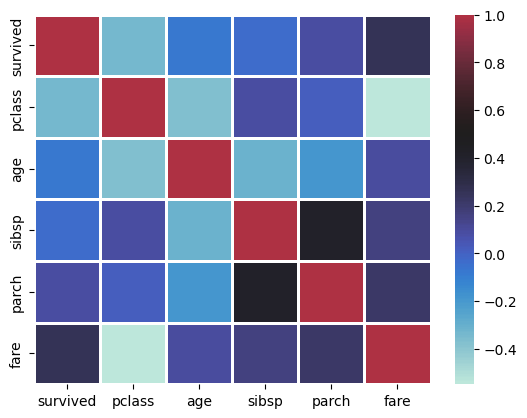

In [17]:
sns.heatmap(data_train.corr(numeric_only=True), 
            linewidths = 0.75, linecolor = "white",
           center = 0.5)

#### Este primer heatmap lo grafico con el objetivo de analizar cuales de las variables númericas tienen algun tipo de correlación con la variable objetivo. Se puede apreciar que tanto 'fare' como 'pclass' estan relacionadas. 'pclass' tiene ua correlación negativa mientras que 'fare' tiene una correlación positiva. Ambas variables serán importantes para el análisis.

## Análisis de Variables

### Variable 'survived'

In [18]:
data_train['survived'].info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


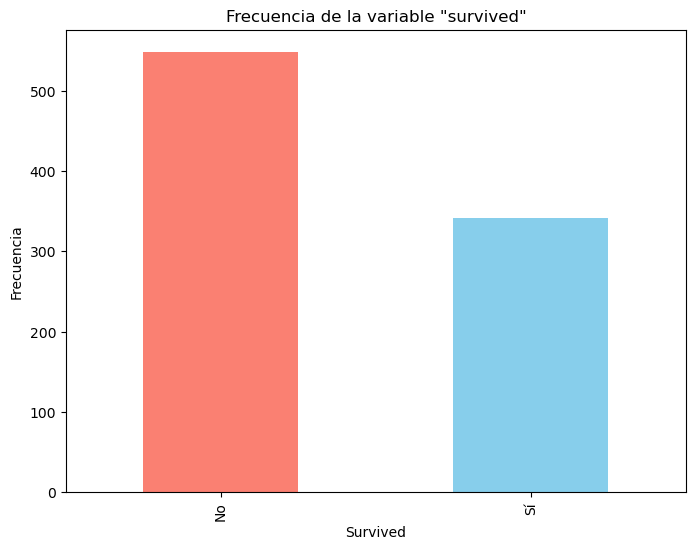

In [19]:
survived_counts = data_train['survived'].value_counts()

plt.figure(figsize=(8, 6))
survived_counts.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Frecuencia de la variable "survived"')
plt.xlabel('Survived')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No', 'Sí'])  # Etiquetas para los valores de 'survived'
plt.show()

### Variable 'cabin'

In [20]:
data_train['cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: cabin, dtype: object

In [21]:
data_train['cabin'].value_counts()

cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [22]:
# La varible cuenta con 147 valores únicos, además, con 78% de nulos. Decido eliminarla.

data_train = data_train.drop(columns='cabin')
data_test = data_test.drop(columns='cabin')

### Variable 'age'

In [23]:
data_train['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [24]:
data_train['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [25]:
data_train['age'].info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [26]:
def grafico_distribucion_unico(data, column):
    # Copia de los datos y eliminación de valores nulos
    data_copy = data.copy()
    data_copy = data_copy.dropna()

    # Gráfico de distribución
    sns.distplot(data_copy[column])

    # Calcular la media y la mediana
    mean_value = data_copy[column].mean()
    median_value = data_copy[column].median()

    # Agregar líneas para la media y la mediana
    plt.axvline(mean_value, color='r', linestyle='--', label='Media')  # Línea para la media en rojo
    plt.axvline(median_value, color='g', linestyle='-.', label='Mediana')  # Línea para la mediana en verde

    # Mostrar la leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

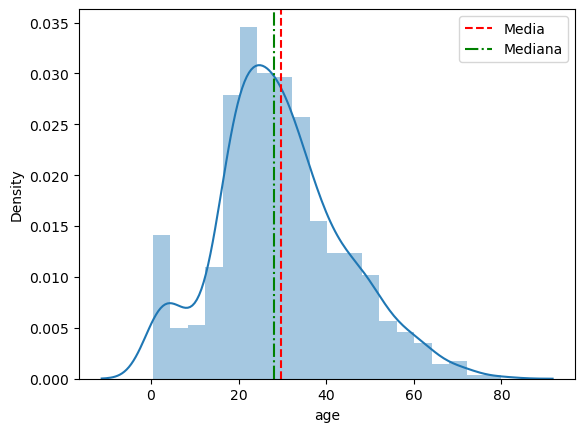

In [27]:
import warnings 
warnings.filterwarnings('ignore')

grafico_distribucion_unico(data_train, 'age')

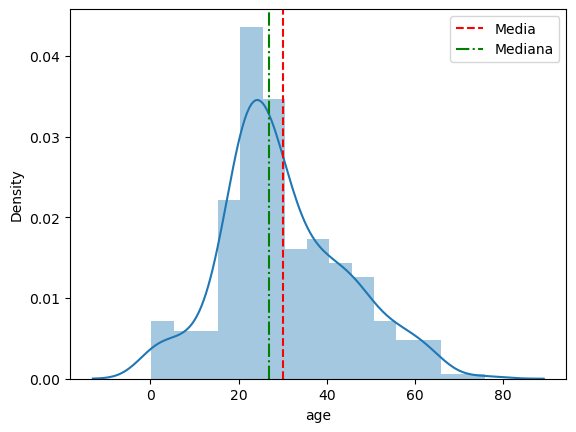

In [28]:
import warnings 
warnings.filterwarnings('ignore')

grafico_distribucion_unico(data_test, 'age')

#### La variable age posee una distribución asimétrica con sesgo positivo de debido a la cola hacia la derecha, generada por valores altos o atípico. En este caso, conviene imputar los nulos de 'age' por la mediana, de esta forma conservaremos la distribución original y además es menos sensible a los valores atípicos.

In [29]:
median_age_train = data_train['age'].median()
data_train['age'] = data_train['age'].fillna(median_age_train)

In [30]:
median_age_test = data_test['age'].median()
data_test['age'] = data_test['age'].fillna(median_age_test)

In [31]:
data_train['age'] = data_train['age'].round(0).astype(int)
data_test['age'] = data_test['age'].round(0).astype(int)

In [32]:
data_test['age'].unique()

array([34, 47, 62, 27, 22, 14, 30, 26, 18, 21, 46, 23, 63, 24, 35, 45, 55,
        9, 48, 50, 41, 33, 25, 39, 60, 36, 20, 28, 10, 17, 32, 13, 31, 29,
        6, 67, 49,  2, 76, 43, 16,  1, 12, 42, 53, 40, 61,  7, 15, 54, 64,
       37,  8,  0, 38, 57, 19, 58, 59, 44,  5, 51,  3])

In [33]:
data_train['age_bin'] = pd.cut(data_train['age'], bins=[-1,12,20,40,81], labels=['child','teen','adult','elder'])

In [34]:
data_test['age_bin'] = pd.cut(data_test['age'], bins=[-1,12,20,40,81], labels=['child','teen','adult','elder'])

In [35]:
data_train.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,age_bin
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S,adult


#### Además de redondear los valores de 'age', creo bins para clasificar las edades en categorías.

In [36]:
def plot_dual_graph(data, column1, target_column):
    # Crear una sola figura con dos subgráficos
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Gráfico 1: Frecuencia de valores en column1
    data[column1].value_counts().plot(kind='bar', color='darkgreen', ax=axs[0])
    axs[0].set_title('Frecuencia de {}'.format(column1))
    axs[0].set_xlabel(column1)
    axs[0].set_ylabel('Frecuencia')

    # Gráfico 2: Agrupación por column1 y target_column
    grouped_data = data.groupby([column1, target_column]).size().unstack().fillna(0)
    column1_order = data[column1].value_counts().index
    grouped_data = grouped_data.loc[column1_order]
    grouped_data.plot(kind='bar', ax=axs[1], color=['salmon', 'skyblue'])
    axs[1].set_title('{} & {}'.format(column1, target_column))
    axs[1].set_xlabel(column1)
    axs[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()


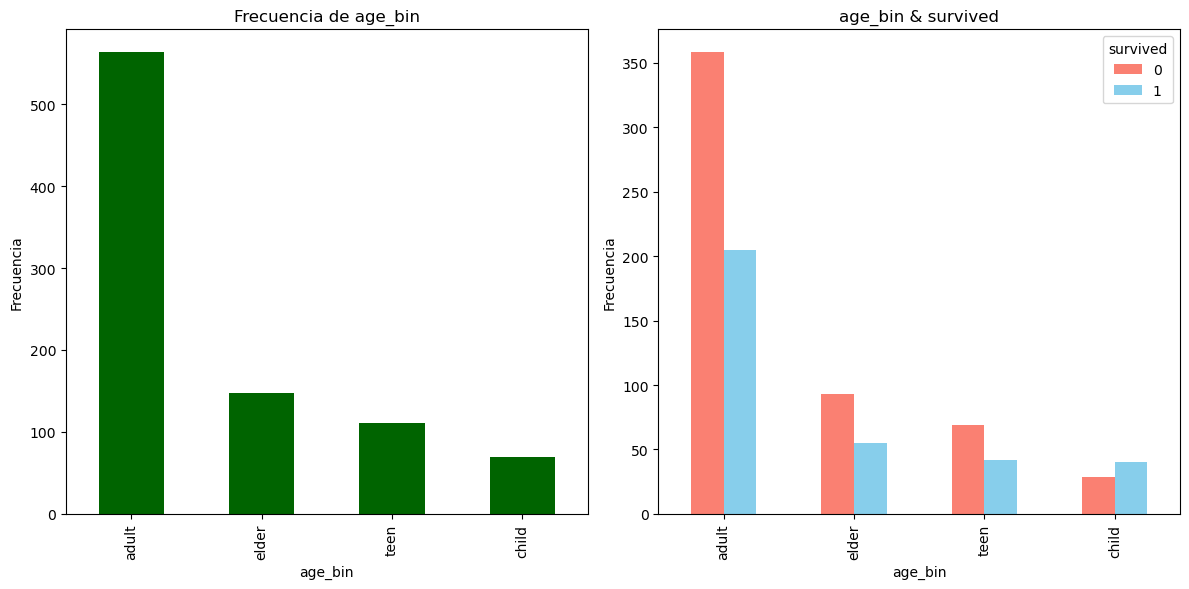

In [37]:
plot_dual_graph(data_train, 'age_bin', 'survived')

### Variable 'fare'

In [38]:
data_train['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [39]:
data_train['fare'].value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

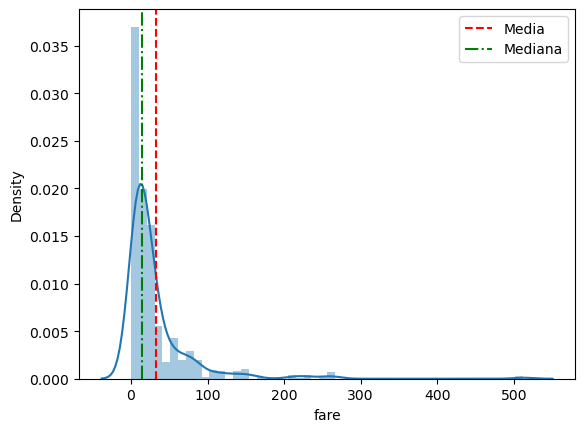

In [40]:
import warnings 
warnings.filterwarnings('ignore')

grafico_distribucion_unico(data_train, 'fare')

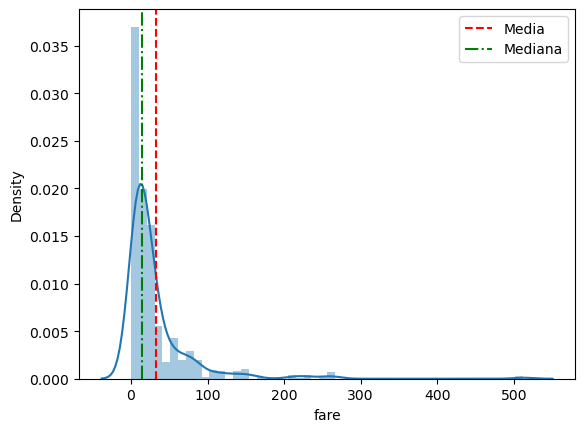

In [41]:
import warnings 
warnings.filterwarnings('ignore')

grafico_distribucion_unico(data_train, 'fare')

In [42]:
# Usando loc
filas_fare_cero = data_train.loc[data_train['fare'] == 0]

# Imprimir las filas
print(filas_fare_cero)


             survived  pclass                              name   sex  age  \
passengerid                                                                  
180                 0       3               Leonard, Mr. Lionel  male   36   
264                 0       1             Harrison, Mr. William  male   40   
272                 1       3      Tornquist, Mr. William Henry  male   25   
278                 0       2       Parkes, Mr. Francis "Frank"  male   28   
303                 0       3   Johnson, Mr. William Cahoone Jr  male   19   
414                 0       2    Cunningham, Mr. Alfred Fleming  male   28   
467                 0       2             Campbell, Mr. William  male   28   
482                 0       2  Frost, Mr. Anthony Wood "Archie"  male   28   
598                 0       3               Johnson, Mr. Alfred  male   49   
634                 0       1     Parr, Mr. William Henry Marsh  male   28   
675                 0       2        Watson, Mr. Ennis Hastings 

In [43]:
data_test['fare'] = data_test['fare'].fillna(data_test['fare'].median())

In [44]:
data_test['fare'].isnull().sum()

0

#### De la misma forma que con 'age', decido imputar el valor perdido por la mediana.

In [45]:
def plot_distribution(data, column):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribución de {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

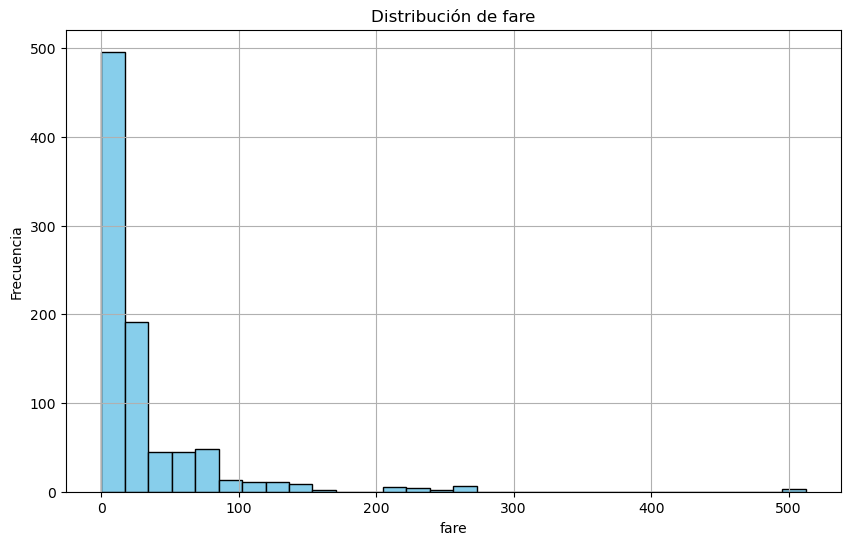

In [46]:
plot_distribution(data_train, 'fare')

In [47]:
data_train['fare_bin'] = pd.cut(data_train['fare'], bins=[-1,7.91,14.46,31,513], labels=['low_fare','median_fare','average_fare','high_fare'])

In [48]:
data_test['fare_bin'] = pd.cut(data_test['fare'], bins=[-1,7.91,14.46,31,513], labels=['low_fare','median_fare','average_fare','high_fare'])

In [49]:
data_train.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,age_bin,fare_bin
passengerid,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S,adult,low_fare


#### Siguiendo lo trabajado en 'age', crear bins para 'fare' puede ser una buena idea, por lo que creo 4 categorías para clasificar los valores.

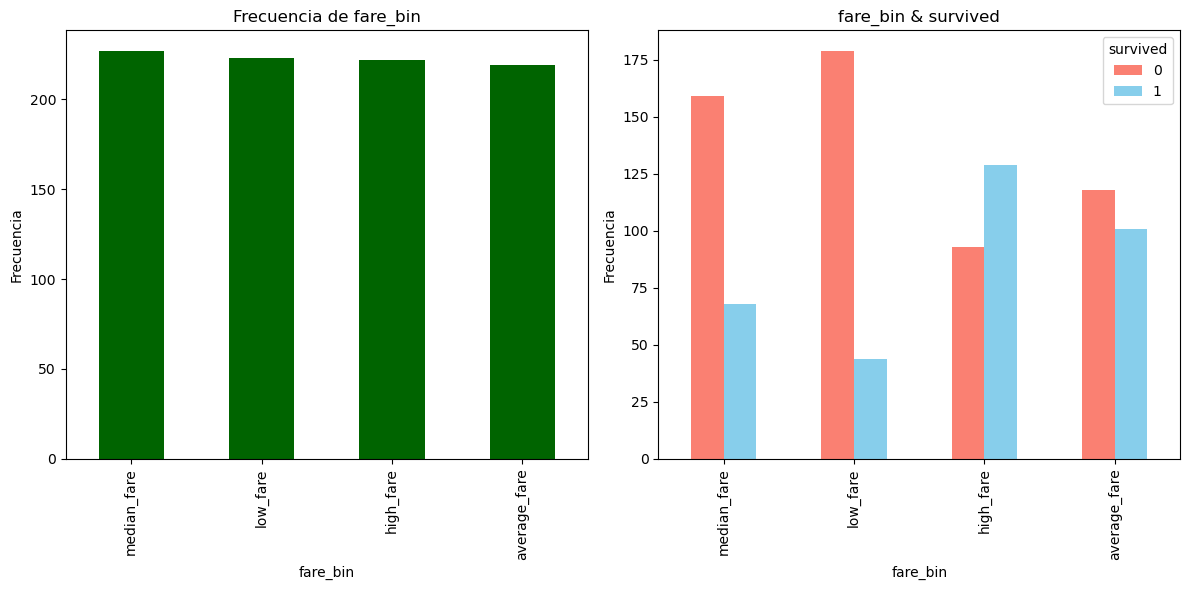

In [50]:
plot_dual_graph(data_train, 'fare_bin', 'survived')

#### Con el gráfico de arriba podemos concluir que cuanto más alto es el valor de 'fare', más son las probabilidades de que la persona haya sobrevivido.

### Variable 'embarked'

In [51]:
data_train['embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object

In [52]:
data_train['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [53]:
data_train['embarked'] = data_train['embarked'].fillna(data_train['embarked'].mode()[0])

In [54]:
data_train['embarked'].isnull().sum()

0

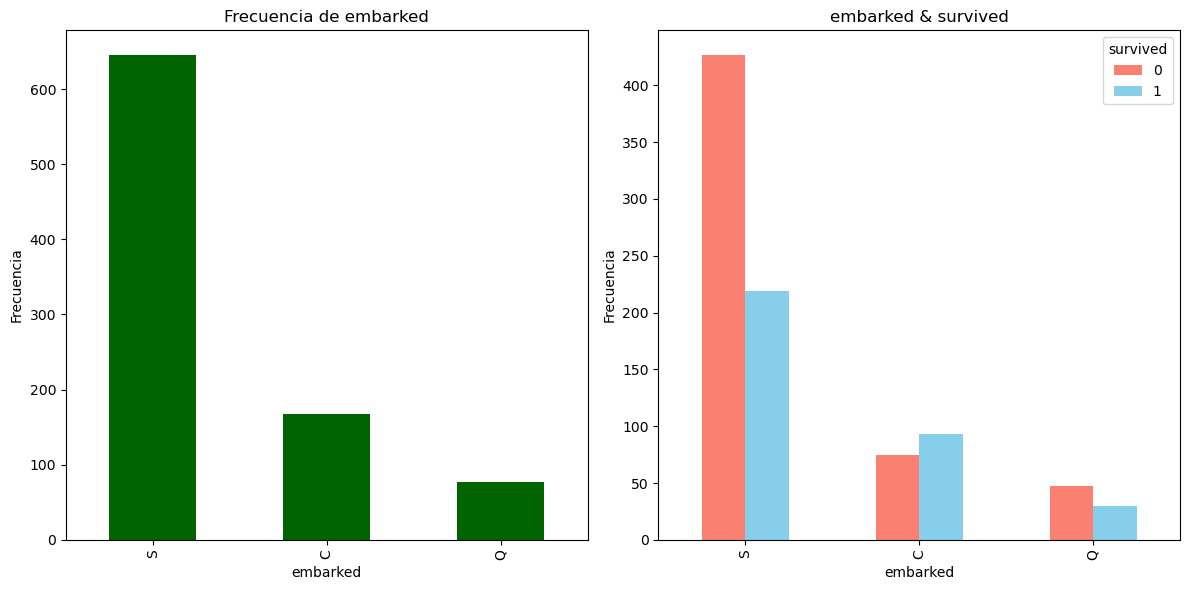

In [55]:
plot_dual_graph(data_train, 'embarked', 'survived')

In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(data_train['embarked'])

# Transforma las etiquetas de la columna "sex" en valores numéricos
data_train['embarked'] = label_encoder.transform(data_train['embarked'])

label_encoder.fit(data_test['embarked'])

data_test['embarked'] = label_encoder.transform(data_test['embarked'])

data_train

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,age_bin,fare_bin
passengerid,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,2,adult,low_fare
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,0,adult,high_fare
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,2,adult,median_fare
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,2,adult,high_fare
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,2,adult,median_fare
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,2,adult,median_fare
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,2,teen,average_fare
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,2,adult,average_fare


### Variable 'name'

In [57]:
data_train['name'].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: name, dtype: object

In [58]:
import re

def extraer_titulo(nombre):
    # Definir patrón de expresión regular para buscar los títulos (Mr., Miss, Mrs., etc.)
    patron = r',\s*(Mr|Miss|Mrs|Master|Rev|Dr|Ms|Col)\.'
    
    # Buscar coincidencias en el nombre utilizando expresiones regulares
    matches = re.search(patron, nombre)
    
    # Si se encuentra una coincidencia, devolver el título
    if matches:
        return matches.group(1)
    else:
        return None  # Si no se encuentra un título, devolver None

In [59]:
# Aplicar la función extraer_titulo a la columna 'Nombre' del DataFrame
data_train['titulo'] = data_train['name'].apply(extraer_titulo)

print(data_train['titulo'])

passengerid
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: titulo, Length: 891, dtype: object


In [60]:
data_train['titulo'].isnull().sum()

11

In [61]:
data_train[data_train['titulo'].isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,age_bin,fare_bin,titulo
passengerid,,,,,,,,,,,,,
31,0,1,"Uruchurtu, Don. Manuel E",male,40,0,0,PC 17601,27.7208,0,adult,average_fare,None
370,1,1,"Aubart, Mme. Leontine Pauline",female,24,0,0,PC 17477,69.3000,0,adult,high_fare,None
450,1,1,"Peuchen, Major. Arthur Godfrey",male,52,0,0,113786,30.5000,2,elder,average_fare,None
537,0,1,"Butt, Major. Archibald Willingham",male,45,0,0,113050,26.5500,2,elder,average_fare,None
557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48,1,0,11755,39.6000,0,elder,high_fare,None
600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49,1,0,PC 17485,56.9292,0,elder,high_fare,None
642,1,1,"Sagesser, Mlle. Emma",female,24,0,0,PC 17477,69.3000,0,adult,high_fare,None
711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24,0,0,PC 17482,49.5042,0,adult,high_fare,None
746,0,1,"Crosby, Capt. Edward Gifford",male,70,1,1,WE/P 5735,71.0000,2,elder,high_fare,None


In [62]:
data_train['titulo'] = data_train['titulo'].fillna('Other')

In [63]:
data_train[data_train['titulo'].isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,age_bin,fare_bin,titulo
passengerid,,,,,,,,,,,,,


In [64]:
data_train = data_train.drop(columns='name')

In [65]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       891 non-null    int32   
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   ticket    891 non-null    object  
 7   fare      891 non-null    float64 
 8   embarked  891 non-null    int32   
 9   age_bin   891 non-null    category
 10  fare_bin  891 non-null    category
 11  titulo    891 non-null    object  
dtypes: category(2), float64(1), int32(2), int64(4), object(3)
memory usage: 71.7+ KB


In [66]:
data_test['name'].describe()

count                  418
unique                 418
top       Kelly, Mr. James
freq                     1
Name: name, dtype: object

In [67]:
# Aplicar la función extraer_titulo a la columna 'Nombre' del DataFrame
data_test['titulo'] = data_test['name'].apply(extraer_titulo)

print(data_test['titulo'])

passengerid
892         Mr
893        Mrs
894         Mr
895         Mr
896        Mrs
         ...  
1305        Mr
1306      None
1307        Mr
1308        Mr
1309    Master
Name: titulo, Length: 418, dtype: object


In [68]:
data_test['titulo'].isnull().sum()

1

In [69]:
data_test[data_test['titulo'].isnull()]

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,age_bin,fare_bin,titulo
passengerid,,,,,,,,,,,,
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,0,adult,high_fare,None


In [70]:
data_test['titulo'] = data_test['titulo'].fillna('Other')

In [71]:
data_test[data_test['titulo'].isnull()]

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,age_bin,fare_bin,titulo
passengerid,,,,,,,,,,,,


In [72]:
data_test = data_test.drop(columns='name')

In [73]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    418 non-null    int64   
 1   sex       418 non-null    object  
 2   age       418 non-null    int32   
 3   sibsp     418 non-null    int64   
 4   parch     418 non-null    int64   
 5   ticket    418 non-null    object  
 6   fare      418 non-null    float64 
 7   embarked  418 non-null    int32   
 8   age_bin   418 non-null    category
 9   fare_bin  418 non-null    category
 10  titulo    418 non-null    object  
dtypes: category(2), float64(1), int32(2), int64(3), object(3)
memory usage: 30.6+ KB


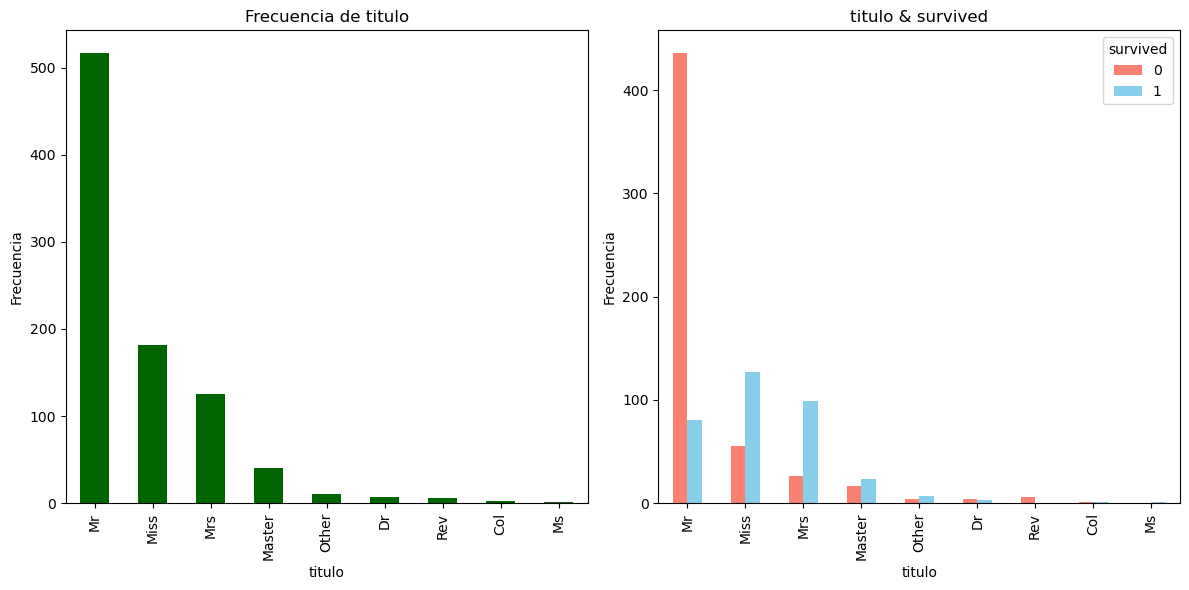

In [74]:
plot_dual_graph(data_train, 'titulo', 'survived')

In [75]:
# Paso la variable a 'category'

data_train['titulo'] = data_train['titulo'].astype('category')
data_test['titulo'] = data_test['titulo'].astype('category')

### Variable 'ticket'

In [76]:
data_train['ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: ticket, dtype: object

In [77]:
data_train['ticket'].value_counts()

ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [78]:
data_train = data_train.drop(columns='ticket')

In [79]:
data_test = data_test.drop(columns='ticket')

#### Elimino la variable ya que los tickets poseen referencias muy diferentes y no me permiten clasificarlos de ninguna forma.

### Variable 'sex'

In [80]:
data_train['sex'].describe()

count      891
unique       2
top       male
freq       577
Name: sex, dtype: object

In [81]:
data_train['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [82]:
data_train['sex']

passengerid
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: sex, Length: 891, dtype: object

In [83]:
data_test['sex']

passengerid
892       male
893     female
894       male
895       male
896     female
         ...  
1305      male
1306    female
1307      male
1308      male
1309      male
Name: sex, Length: 418, dtype: object

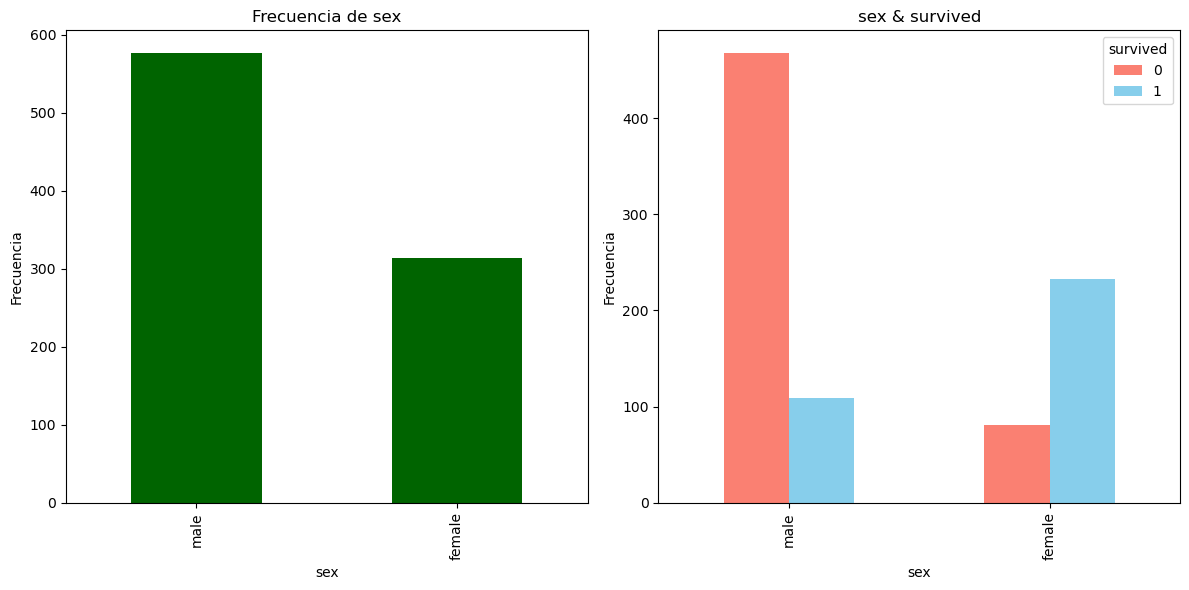

In [84]:
plot_dual_graph(data_train, 'sex', 'survived')

In [85]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [86]:
label_encoder.fit(data_train['sex'])

# Transforma las etiquetas de la columna "sex" en valores numéricos
data_train['sex'] = label_encoder.transform(data_train['sex'])

label_encoder.fit(data_test['sex'])

data_test['sex'] = label_encoder.transform(data_test['sex'])

data_train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_bin,fare_bin,titulo
passengerid,,,,,,,,,,,
1,0,3,1,22,1,0,7.2500,2,adult,low_fare,Mr
2,1,1,0,38,1,0,71.2833,0,adult,high_fare,Mrs
3,1,3,0,26,0,0,7.9250,2,adult,median_fare,Miss
4,1,1,0,35,1,0,53.1000,2,adult,high_fare,Mrs
5,0,3,1,35,0,0,8.0500,2,adult,median_fare,Mr
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27,0,0,13.0000,2,adult,median_fare,Rev
888,1,1,0,19,0,0,30.0000,2,teen,average_fare,Miss
889,0,3,0,28,1,2,23.4500,2,adult,average_fare,Miss


### Variable 'pclass'

In [87]:
data_train['pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64

In [88]:
data_train['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

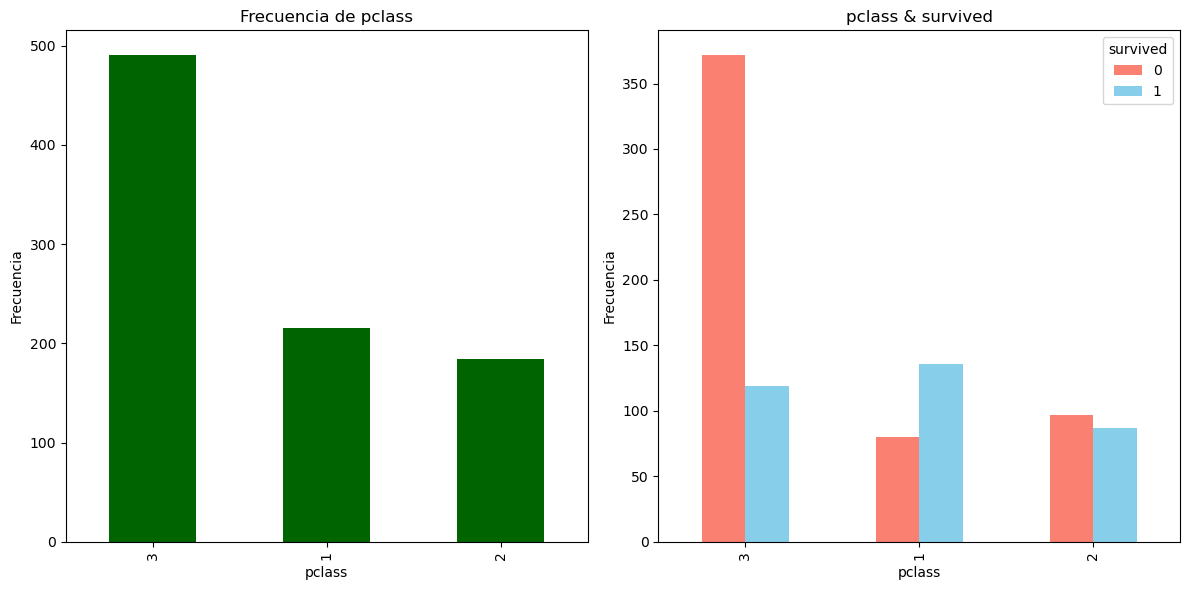

In [89]:
plot_dual_graph(data_train, 'pclass', 'survived')

### Variable 'sibsp' 

In [90]:
data_train['sibsp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64

In [91]:
data_train['sibsp'].value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

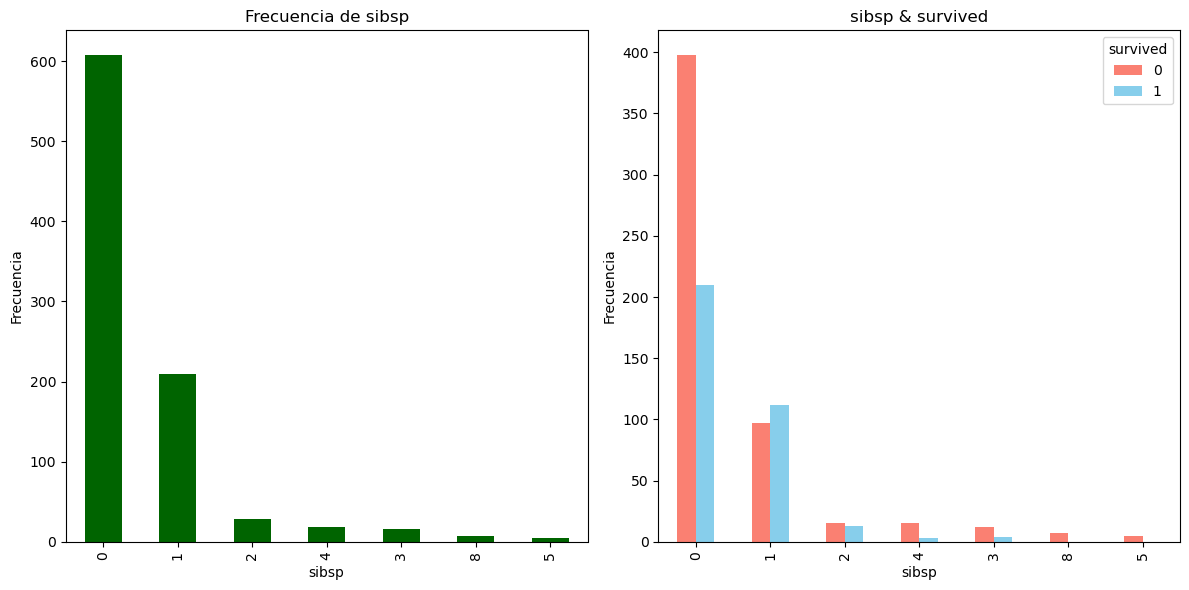

In [92]:
plot_dual_graph(data_train, 'sibsp', 'survived')

### Variable 'parch' 

In [93]:
data_train['parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64

In [94]:
data_train['parch'].value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

### Nueva Variable 'family_size'

In [95]:
data_train['family_size'] = data_train['sibsp'] + data_train['parch'] + 1

In [96]:
data_test['family_size'] = data_test['sibsp'] + data_test['parch'] + 1

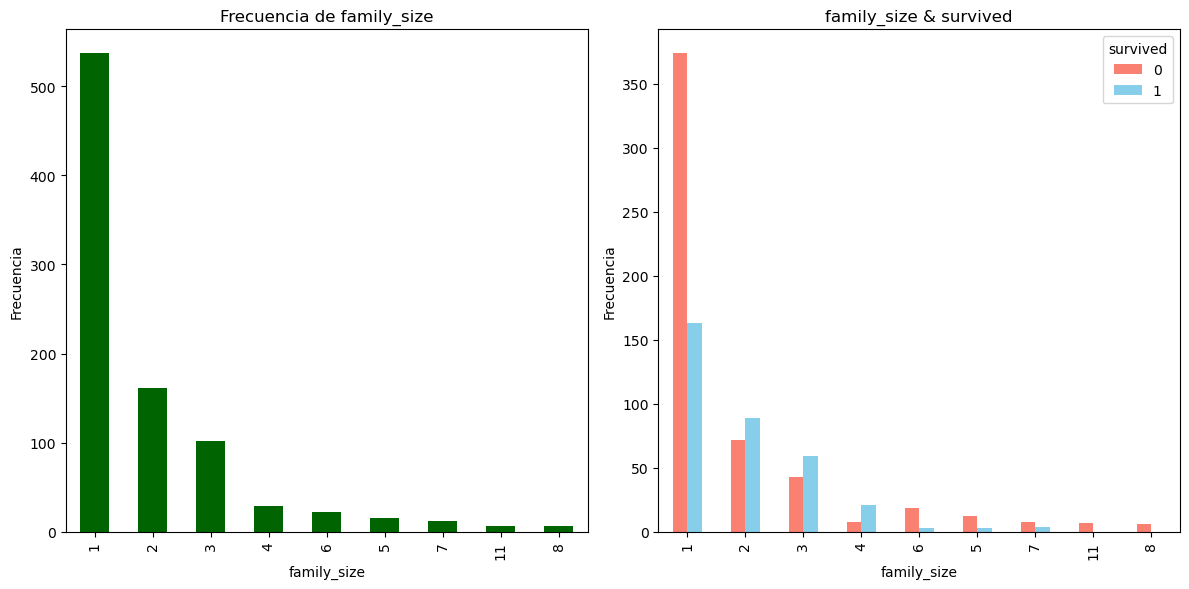

In [97]:
plot_dual_graph(data_train, 'family_size', 'survived')

### Nueva Variable 'is_alone'

In [98]:
data_train['is_alone'] = (data_train['family_size'] == 1).astype(int)

In [99]:
data_test['is_alone'] = (data_test['family_size'] == 1).astype(int)

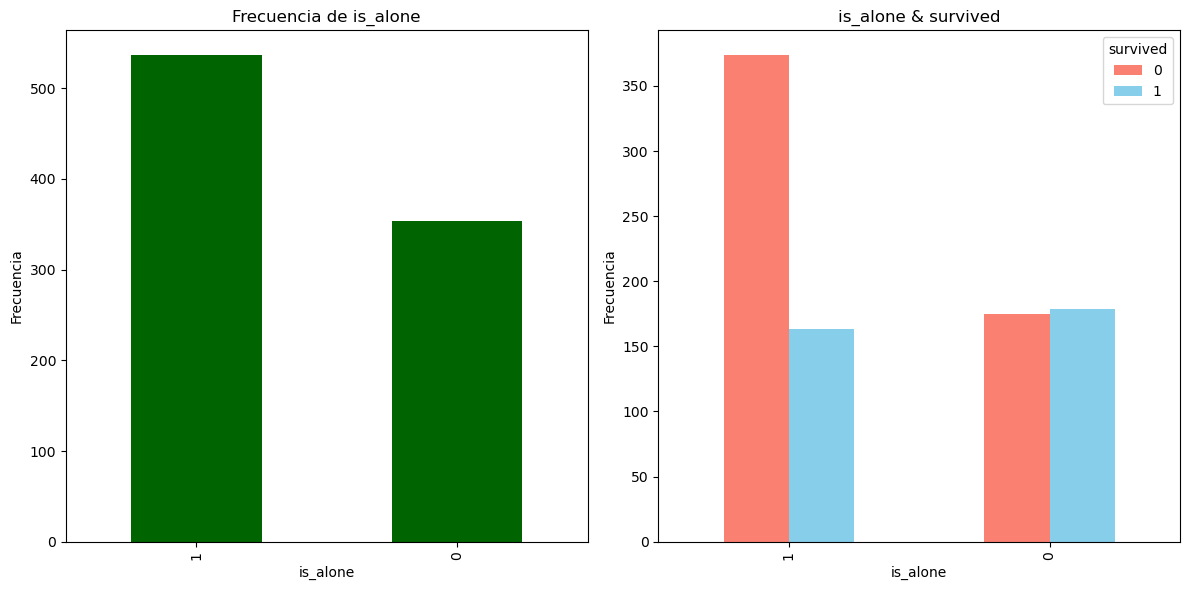

In [100]:
plot_dual_graph(data_train, 'is_alone', 'survived')

#### Por lo que vemos en el gráfico, si la persona viajaba sola, tenía más posibilidades de no sobrevivir.

## Heatmap de correlación con nuevas variables

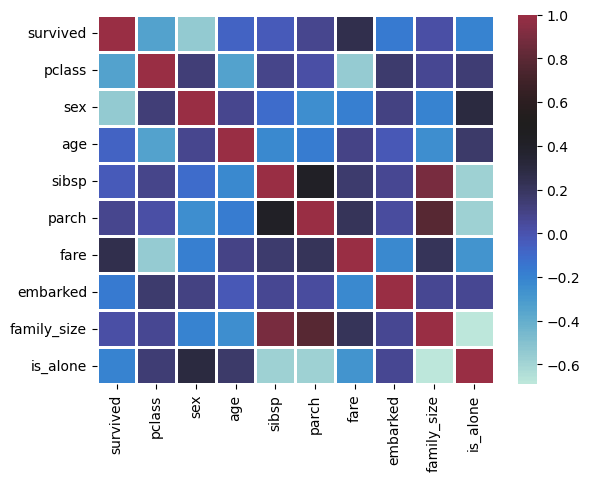

In [101]:
sns.heatmap(data_train.corr(numeric_only=True), 
            linewidths = 0.75, linecolor = "white",
           center = 0.5);

#### Con el gráfico anterior podemos ver que hay variables que parecen tener una correlación con la variable objetivo. Sobre todo las variables 'fare' y 'sex', parece que serán importantes para nuestro modelo. 

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_relationship_all(data, target):
    # Obtenemos todas las columnas excepto la variable objetivo
    predictors = [col for col in data.columns if col != target]
    
    # Para cada variable predictora, calculamos la tasa de supervivencia promedio
    for predictor in predictors:
        plt.figure(figsize=(8, 6))
        survival_rate = data.groupby(predictor)[target].mean()
        sns.barplot(x=survival_rate.index, y=survival_rate.values, palette="viridis")
        plt.title(f'Relación entre {predictor} y {target}')
        plt.xlabel(predictor)
        plt.ylabel('Survival Rate')
        plt.xticks(rotation=45)
        plt.show()

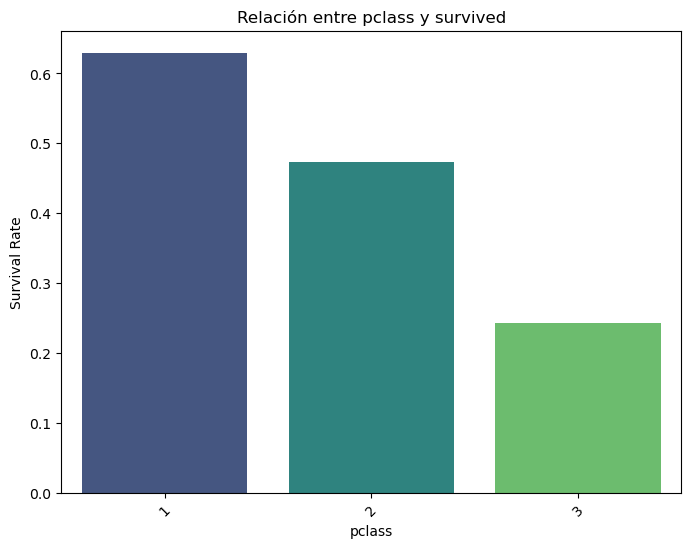

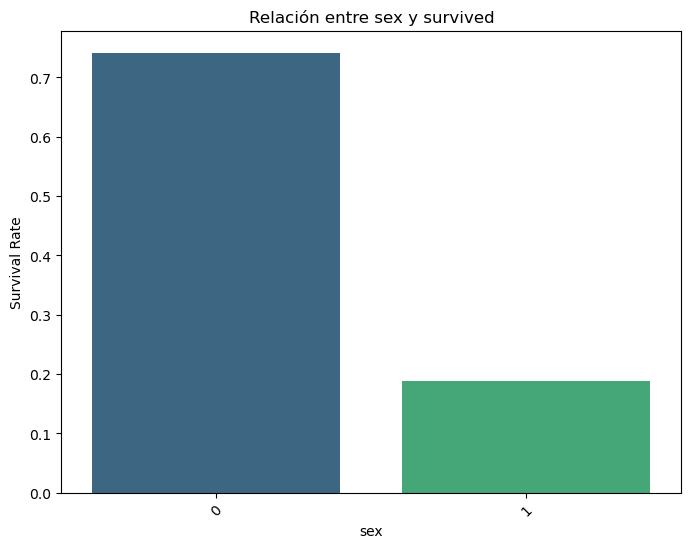

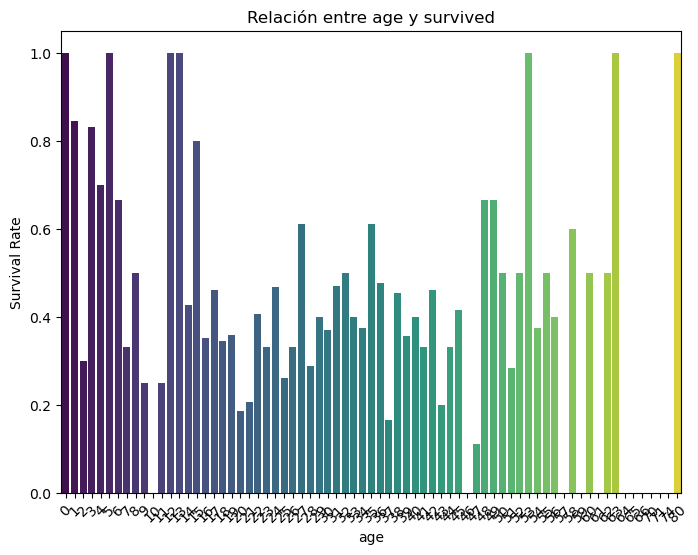

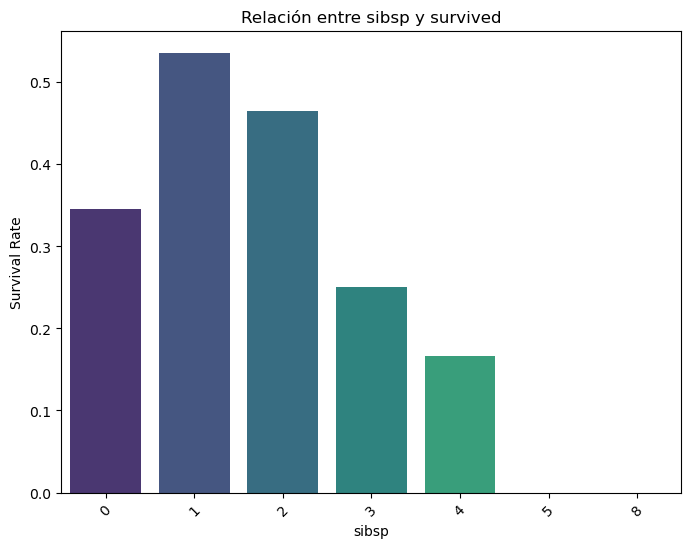

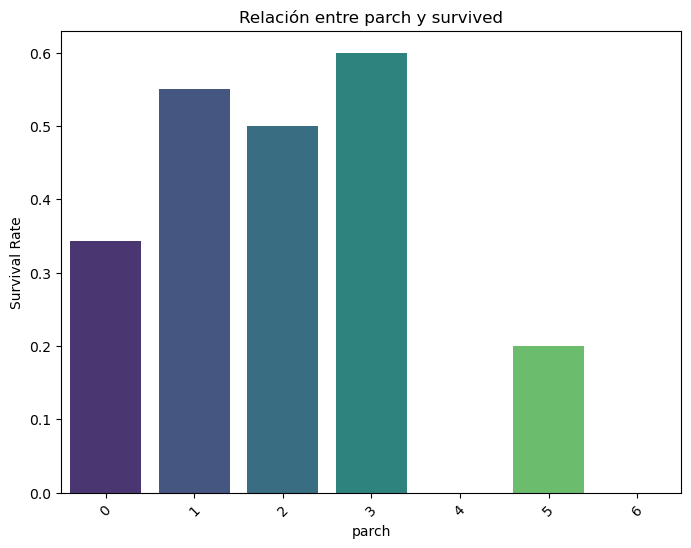

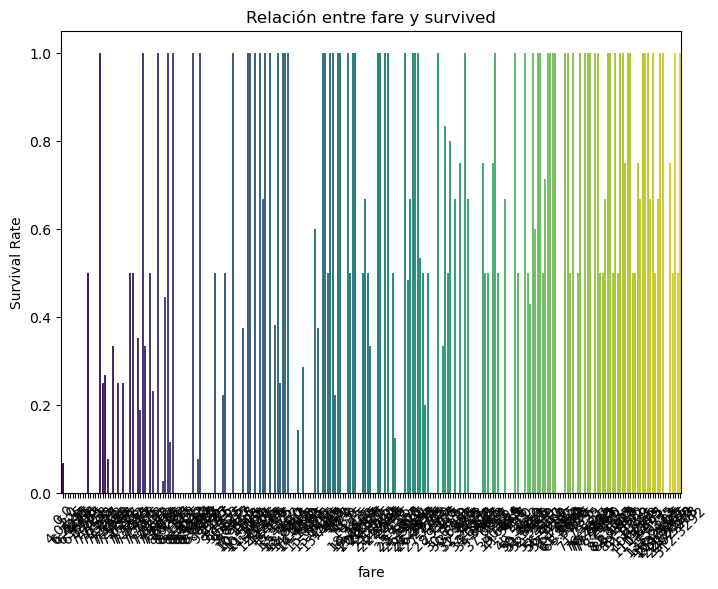

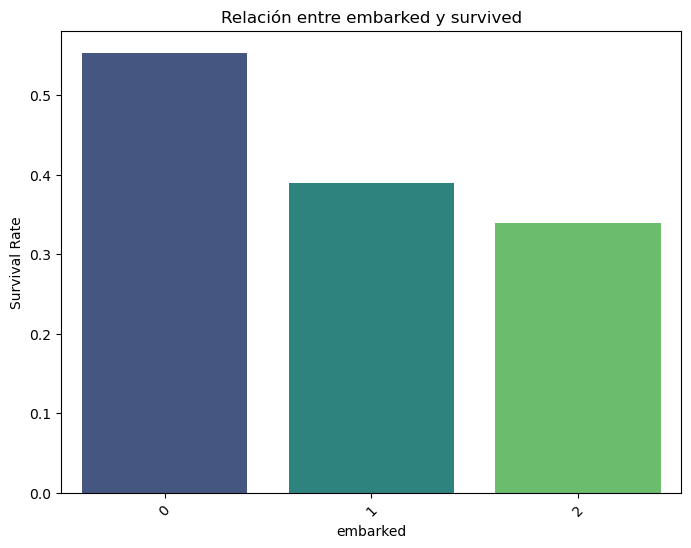

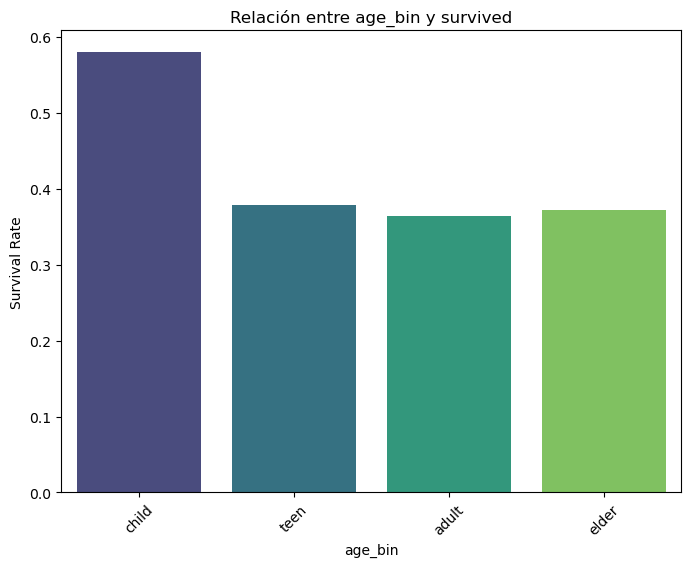

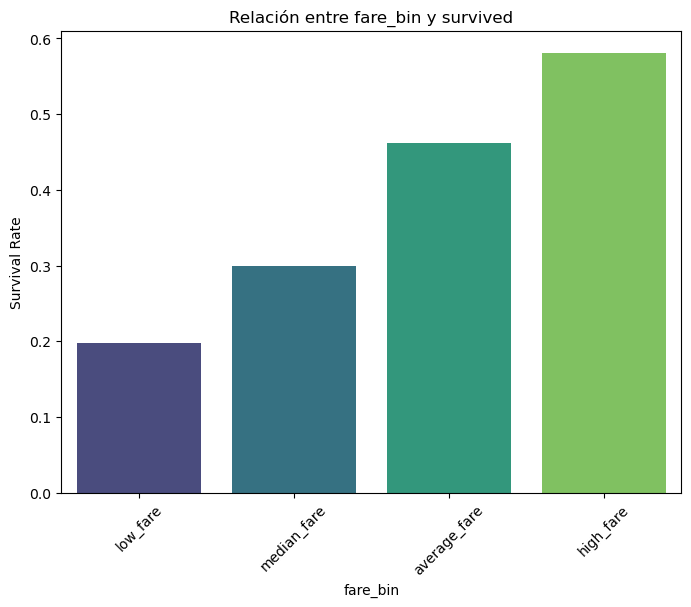

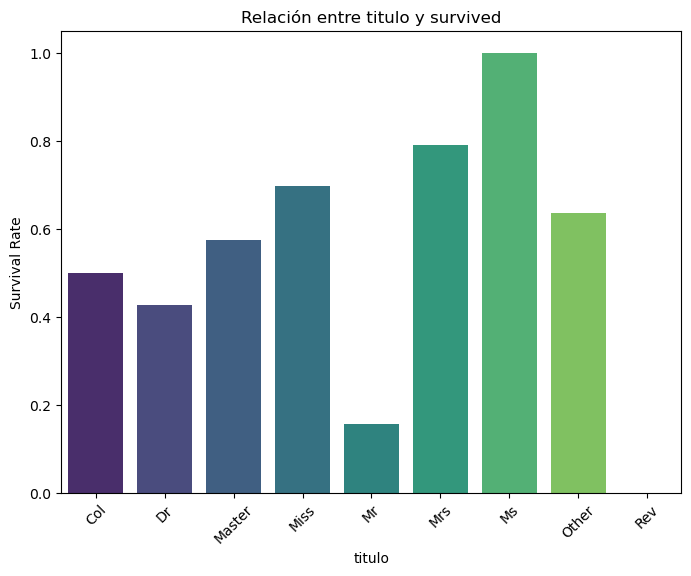

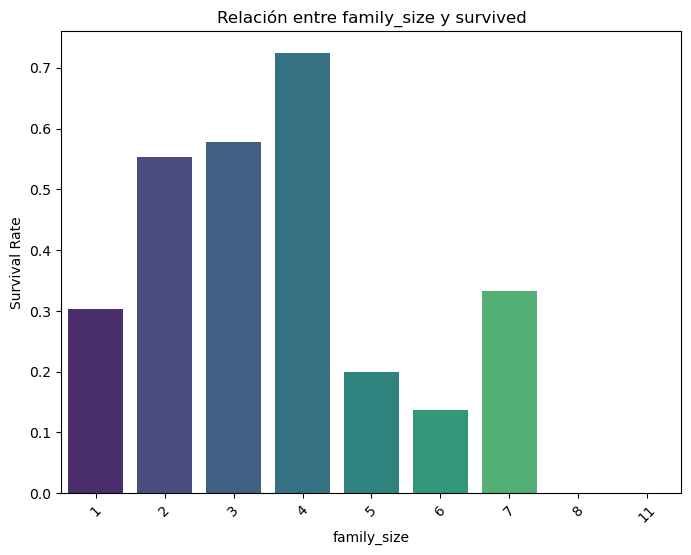

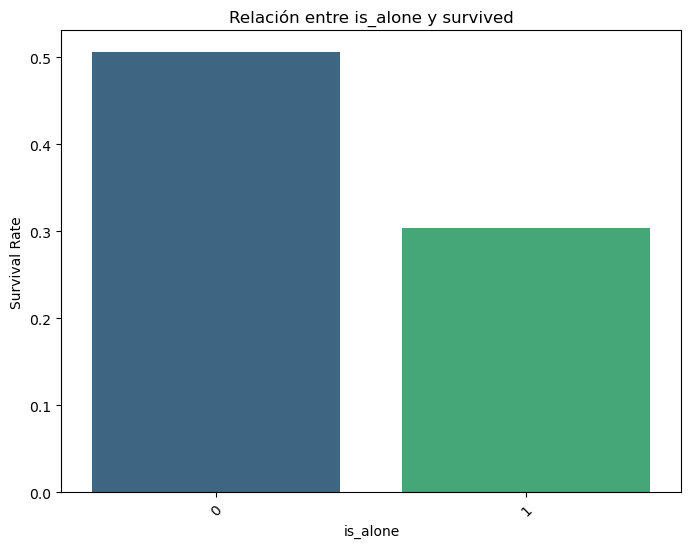

In [103]:
plot_relationship_all(data_train, 'survived')

# Codifico variables categóricas

In [104]:
data_train.select_dtypes(include=['category']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age_bin   891 non-null    category
 1   fare_bin  891 non-null    category
 2   titulo    891 non-null    category
dtypes: category(3)
memory usage: 10.3 KB


In [105]:
data_test.select_dtypes(include=['category']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age_bin   418 non-null    category
 1   fare_bin  418 non-null    category
 2   titulo    418 non-null    category
dtypes: category(3)
memory usage: 5.3 KB


In [106]:
dummy_cols = data_train.select_dtypes(include=['category']).columns

In [107]:
dummy_cols_test = data_test.select_dtypes(include=['category']).columns

In [108]:
data_train = pd.get_dummies(data_train, columns = dummy_cols)

In [109]:
data_test = pd.get_dummies(data_test, columns = dummy_cols_test)

In [110]:
data_train.shape

(891, 27)

In [111]:
data_test.shape

(418, 26)

## Oversampling

  File "C:\Users\Guillermo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


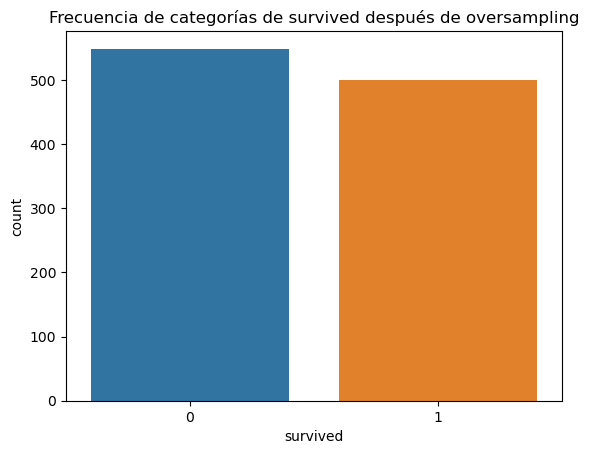

In [112]:
from imblearn.over_sampling import SMOTE

# Separar características y variable objetivo
X = data_train.drop(columns=['survived'])
y = data_train['survived']

# Aplicar SMOTE para hacer oversampling de la categoría menos frecuente
smote = SMOTE(sampling_strategy={1: 500}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convertir el resultado a un DataFrame de Pandas para visualización
data_train = pd.DataFrame(X_resampled, columns=X.columns)
data_train['survived'] = y_resampled

# Mostrar la nueva frecuencia de las categorías de status_group
sns.countplot(x='survived', data=data_train)
plt.title('Frecuencia de categorías de survived después de oversampling')
plt.show()

### Guardo el archivo

In [113]:
# Chequeo que la única variable diferente entre test y train sea la objetivo.

columns_data_train = set(data_train.columns)
columns_data_test = set(data_test.columns)

# Encontrar las columnas que están en 'data' pero no en 'data_test'
columns_missing_in_data_test = columns_data_train - columns_data_test

# Encontrar las columnas que están en 'data_test' pero no en 'data'
columns_missing_in_data_train= columns_data_test - columns_data_train

# Mostrar las columnas que no coinciden
print("Columnas en data_train pero no en data_test:", columns_missing_in_data_test)
print("Columnas en data_test pero no en data:", columns_missing_in_data_train)

Columnas en data_train pero no en data_test: {'survived'}
Columnas en data_test pero no en data: set()


In [114]:
# Guardo como csv

data_train.to_csv("data_train_clean_final.csv", index = False)
data_test.to_csv("data_test_clean_final.csv", index = False)